<br>

## 1. Data loading & preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing

In [2]:
x_data = datasets.load_boston().data 
y_data = datasets.load_boston().target # 집의 가격 (in $1,000s)

sc = preprocessing.StandardScaler() # Apply standard scaling on x_data
x_data = sc.fit_transform(x_data)
y_data = np.reshape(y_data, (len(y_data), 1))

print(x_data.shape)
print(y_data.shape)

(506, 13)
(506, 1)


<br>

## 2. Devide dataframe into X & Y -> Train X / Test X / Train Y / Test Y

In [3]:
from sklearn import model_selection
train_data, test_data, train_label, test_label = model_selection.train_test_split(x_data, y_data,
                                                                                 test_size=0.3,
                                                                                 random_state=0)
print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

(354, 13)
(152, 13)
(354, 1)
(152, 1)


<br>

## 3. Build & Train the model 

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

import os
tf.logging.set_verbosity(tf.logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

In [22]:
model = models.Sequential() 

model.add(layers.Dense(input_dim=13, units=64, activation=None, kernel_initializer=initializers.he_uniform())) 
# model.add(layers.BatchNormalization()) # Use this line as if needed
model.add(layers.Activation('elu')) # layers.ELU or layers.LeakyReLU

model.add(layers.Dense(units=64, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=32, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))
model.add(layers.Dropout(rate=0.4))

model.add(layers.Dense(units=1, activation=None)) # One-hot vector for 0 & 1

In [23]:
model.compile(optimizer=optimizers.Adam(), 
              loss=losses.mean_squared_error, 
              metrics=[metrics.mean_squared_error]) 

In [24]:
history = model.fit(train_data, train_label, batch_size=100, epochs=1000, validation_split=0.3, verbose=0) 

In [26]:
result = model.evaluate(test_data, test_label) # , batch_size=100

print('loss (mean_squared_error) :', result[0])

152/152 [==============================] - 0s 39us/sample - loss: 14.3276 - mean_squared_error: 14.3276
loss (mean_squared_error) : 14.327624044920269


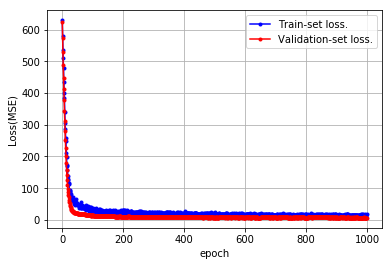

In [29]:
val_loss = history.history['val_mean_squared_error']
loss = history.history['mean_squared_error']

import numpy as np
import matplotlib.pyplot as plt

x_len = np.arange(len(loss))
plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss(MSE)')
plt.show()

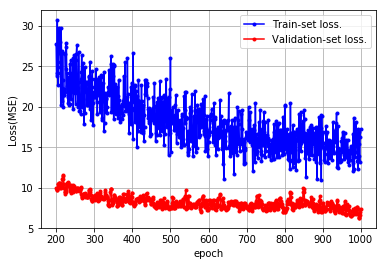

In [30]:
val_loss = history.history['val_mean_squared_error']
loss = history.history['mean_squared_error']

import numpy as np
import matplotlib.pyplot as plt

x_len = np.arange(len(loss))
plt.plot(x_len[200:], loss[200:], marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len[200:], val_loss[200:], marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss(MSE)')
plt.show()

In [31]:
# Prediction on test data
model.predict(test_data)

array([[23.001865 ],
       [30.341816 ],
       [23.519917 ],
       [ 8.621897 ],
       [19.725904 ],
       [18.651169 ],
       [22.58356  ],
       [20.93841  ],
       [18.261274 ],
       [18.75819  ],
       [11.730522 ],
       [ 8.953747 ],
       [15.6071205],
       [ 7.9160542],
       [37.774334 ],
       [35.499966 ],
       [22.14096  ],
       [37.47063  ],
       [30.697788 ],
       [21.229221 ],
       [23.501602 ],
       [20.214874 ],
       [20.496117 ],
       [26.087645 ],
       [20.65684  ],
       [23.134102 ],
       [16.684193 ],
       [17.094961 ],
       [40.733364 ],
       [16.67652  ],
       [15.6028385],
       [17.40868  ],
       [19.15186  ],
       [18.809505 ],
       [25.951664 ],
       [21.914806 ],
       [ 6.3971605],
       [38.364933 ],
       [12.058735 ],
       [15.234416 ],
       [23.002998 ],
       [21.310421 ],
       [19.509674 ],
       [18.444775 ],
       [20.767979 ],
       [25.411621 ],
       [17.902924 ],
       [14.61